## Text classification is a common task in natural language processing (NLP) that involves categorizing text into predefined classes. 
This case study demonstrates the process of text classification using two powerful NLP libraries, NLTK and spaCy, for preprocessing, and scikit-learn for model building and evaluation. We will use the 20 Newsgroups dataset, a classic dataset for text classification, focusing on four categories: 'alt.atheism', 'soc.religion.christian', 'comp.graphics', and 'sci.med'.

## Objective
- To build a text classification model that can accurately categorize newsgroup posts into their respective categories using different text preprocessing techniques.

In [2]:
## Import Libraries and Data
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline #to combine tfid and multinomialNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\om\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
categories = ['alt.atheism', 'soc.religion.christian']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
# Load dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

#Text Preprocessing with NLTK
## We define a custom transformer class using NLTK to preprocess the text data.

In [4]:
#BaseEstimator is used for basic hyperameter tunning
#TransformerMixin is used for process the text. like fit, transformer

class NLTKPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.punct_table = str.maketrans('', '', string.punctuation)

    def preprocess(self, text):
        tokens = word_tokenize(text)
        tokens = [word.lower() for word in tokens]
        tokens = [word.translate(self.punct_table) for word in tokens]
        tokens = [word for word in tokens if word.isalpha()]
        tokens = [word for word in tokens if word not in self.stop_words]
        return ' '.join(tokens)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess(text) for text in X]


# Train and Evaluate Model with NLTK
We create a pipeline that includes the NLTK preprocessor, TfidfVectorizer, and MultinomialNB classifier. We train and evaluate the model.

Accuracy (NLTK): 0.89
                        precision    recall  f1-score   support

           alt.atheism       0.99      0.67      0.80       319
         comp.graphics       0.96      0.95      0.96       389
               sci.med       0.97      0.90      0.93       396
soc.religion.christian       0.73      0.98      0.84       398

              accuracy                           0.89      1502
             macro avg       0.91      0.88      0.88      1502
          weighted avg       0.91      0.89      0.89      1502



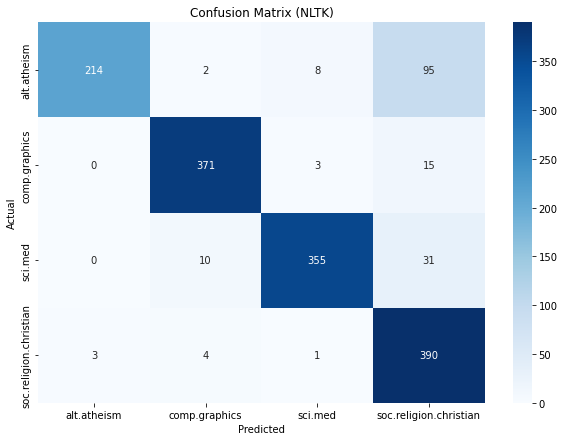

In [5]:
# Create a pipeline for preprocessor, tf-id and modelling
model_nltk = Pipeline([
    ('preprocessor', NLTKPreprocessor()),
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Train the classifier
model_nltk.fit(newsgroups_train.data, newsgroups_train.target)

# Predict the test data
predicted_nltk = model_nltk.predict(newsgroups_test.data)

# Evaluate the classifier
accuracy_nltk = metrics.accuracy_score(newsgroups_test.target, predicted_nltk)
print(f'Accuracy (NLTK): {accuracy_nltk:.2f}')
print(metrics.classification_report(newsgroups_test.target, predicted_nltk, target_names=newsgroups_train.target_names))

# Confusion matrix
conf_matrix_nltk = metrics.confusion_matrix(newsgroups_test.target, predicted_nltk)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nltk, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups_train.target_names, yticklabels=newsgroups_train.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (NLTK)')
plt.show()


## Model Performance on New Samples
To test the models on new provided samples, we use the trained models to predict the category of new texts.

In [7]:
# New sample texts
new_samples = [
    "The CPU performance of the new graphics card is remarkable.",
    "Is there a God? Atheism argues against the existence of a deity.",
    "Christianity is based on the teachings of Jesus Christ.",
    "Medical science has made great strides in the treatment of cancer."
]

# Predict using the NLTK-based model
predicted_nltk_samples = model_nltk.predict(new_samples)
print("NLTK Model Predictions for new samples:")
for text, category in zip(new_samples, predicted_nltk_samples):
    print(f"Text: {text}\nPredicted Category: {newsgroups_train.target_names[category]}\n")


NLTK Model Predictions for new samples:
Text: The CPU performance of the new graphics card is remarkable.
Predicted Category: comp.graphics

Text: Is there a God? Atheism argues against the existence of a deity.
Predicted Category: alt.atheism

Text: Christianity is based on the teachings of Jesus Christ.
Predicted Category: soc.religion.christian

Text: Medical science has made great strides in the treatment of cancer.
Predicted Category: sci.med

